<a href="https://colab.research.google.com/github/PeizuLi5/CMPE257-Fall23-Peizu-Li/blob/class-activities/ClassActivity2_RegularizationValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
import random
# Code based on the professor's provided code
def generate_lr(N=20, w0=0, w1=1):
    X1 = []
    Y = []
    n = 0
    while(n < N):
        x1 = random.uniform(-10, 10)
        x2 = random.uniform(-1, 1)
        y = w0 + w1 * x1 + x2
        X1.append(x1)
        Y.append(y)
        n += 1
    data = [np.array([1, X1[i],Y[i]]) for i in range(N)]
    return data

In [38]:
f_w0, f_w1 = 1, 1
N = 50
data = generate_lr(N, f_w0, f_w1)
X = [i[1] for i in data]
Y = [i[2] for i in data]

In [39]:
lambdas = [0, 0.001, 0.1, 1]

best_model = None
best_error = float('inf')

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

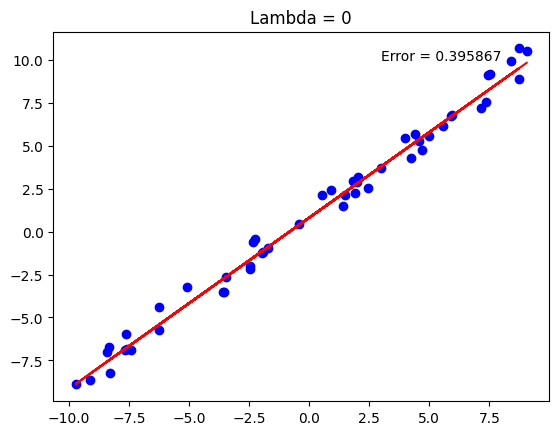

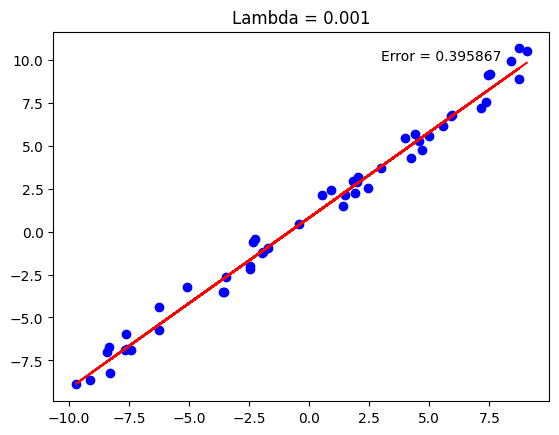

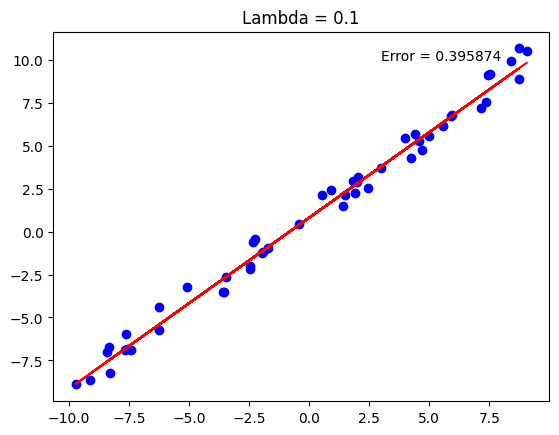

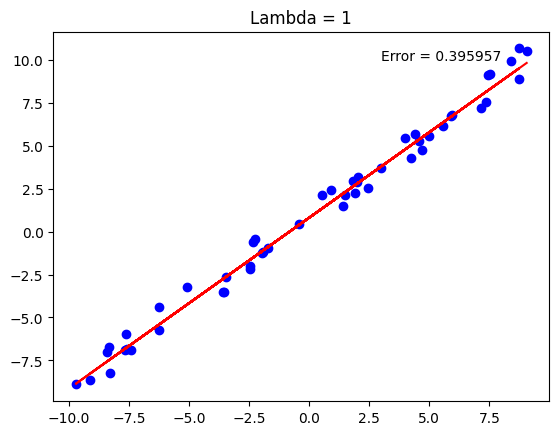

Best Lambda: 0


In [41]:
for i in lambdas:
    model = Ridge(alpha=i)
    errors = []

    kfold = KFold(n_splits=5)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = np.array(X)[train_index], np.array(X)[test_index]
        Y_train, Y_test = np.array(Y)[train_index], np.array(Y)[test_index]

        model.fit(np.array(X_train).reshape(-1, 1), Y_train)
        Y_pred = model.predict(np.array(X_test).reshape(-1, 1))
        error = mean_squared_error(Y_test, Y_pred)
        errors.append(error)

    avg_err = np.mean(errors)
    plt.scatter(X, Y, color='blue', label='Data')
    plt.plot(X, model.predict(np.array(X).reshape(-1, 1)), color='red')
    plt.title(f'Lambda = {i}')
    plt.text(3, 10, f'Error = {avg_err:.6f}')
    plt.show()

    if avg_err < best_error:
        best_error = avg_err
        best_model = model

print("Best Lambda:", best_model.alpha)